# CSC 578 NN&DL Spring 2021
## HW6: Image Classification using a CNN
### Jonathan Lynch
### CSC 578/Section 901


This code is slightly modified from the TensorFlow tutorial [Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn) for the purpose of our homework. The code first downloads the data, the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) and partitions the training set into training and validation sets. Then the code builds a CNN network and trains the network with the training set. Finally the code evaluates the network performance using the validation set.

Note that there are **three places** in the code, indicated with **IMPORTANT**, where you have to choose the syntax that works for the version of TensorFlow (1 or 2) installed on your platform.

### Import Tensorflow
**IMPORTANT (1)**
Uncomment either import line(s) for the version of TensorFlow (TF1 or TF2) of your platform.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
print(tf.__version__)  # check the TF version!

2.4.1


In [2]:
# For TF version 2 (just one line)
from tensorflow.keras import datasets, layers, models

# For TF version 1 (need both lines)
# from tensorflow import keras
# from keras import datasets, layers, models

### Download and prepare the CIFAR10 dataset

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is (pre-)divided into 50,000 training images and 10,000 testing images.


In [3]:
# Download the data from the repository site.
(train_all_images, train_all_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
# !! DO NOT REMOVE THIS LINE !!
# Delete test_labels (by making it an empty list) so that we don't accidentally
# use it in the code.
test_labels = []

# Then split the training set ('train_all') into two subsets: train and 
# validation.  After that, we have 3 subsets: train, validation and test.
from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by using stratefied sampling.  
train_images, valid_images, train_labels, valid_labels \
  = train_test_split(train_all_images, train_all_labels,
                     stratify=train_all_labels, test_size=0.2)


In [5]:
# Normalize pixel values of images to be between 0 and 1
train_images, valid_images, test_images \
  = train_images / 255.0, valid_images / 255.0, test_images / 255.0

In [6]:
train_labels

array([[9],
       [2],
       [0],
       ...,
       [3],
       [6],
       [0]], dtype=uint8)

In [7]:
valid_labels

array([[4],
       [0],
       [5],
       ...,
       [2],
       [8],
       [0]], dtype=uint8)

### Verify the data
To verify that the dataset looks correct, plot the first 10 images from the training set and display the class name below each image.

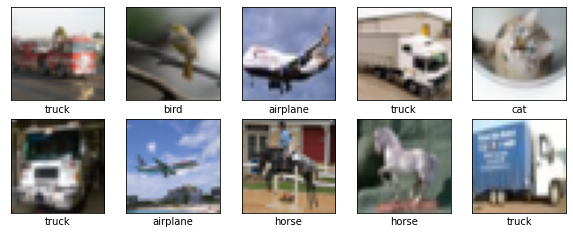

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create a convolutional network
As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size, where color_channels refers to (R,G,B). The format of CIFAR images is 32 * 32 pixels, so the input shape is (32, 32, 3). The output layer has 10 nodes, corresponding to the number of categories of the images.

In this code, the activation function of the output layer is specified to be softmax for the purpose of aligning the two versions of TensorFlow (TF1 and TF2; in particular to make TF2 compatible with TF1's 'sparse_categorical_crossentropy' loss function).

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # As noted above

Verify the model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

### Compile the model
**IMPORTANT (2)** Uncomment either loss function for the version of TensorFlow (TF1 or TF2) of your platform.

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])



### Train the model

In [12]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 59s 46ms/step - loss: 1.8254 - accuracy: 0.3217 - val_loss: 1.4059 - val_accuracy: 0.4925
Epoch 2/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.2693 - accuracy: 0.5439 - val_loss: 1.1947 - val_accuracy: 0.5744
Epoch 3/10
1250/1250 [==============================] - 37s 30ms/step - loss: 1.0731 - accuracy: 0.6177 - val_loss: 1.0584 - val_accuracy: 0.6231
Epoch 4/10
1250/1250 [==============================] - 26s 21ms/step - loss: 0.9623 - accuracy: 0.6618 - val_loss: 0.9764 - val_accuracy: 0.6562
Epoch 5/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.8764 - accuracy: 0.6935 - val_loss: 0.9343 - val_accuracy: 0.6712
Epoch 6/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.8215 - accuracy: 0.7086 - val_loss: 0.9124 - val_accuracy: 0.6798
Epoch 7/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.7724 - accuracy: 0.7291 - val_loss: 0.9006 -

### Evaluate the model
**IMPORTANT (3)** Uncomment either syntax for the version of TensorFlow (TF1 or TF2) of your platform.

313/313 - 2s - loss: 0.9346 - accuracy: 0.6866
valid_accuracy=0.6866000294685364, valid_loss=0.9346339702606201


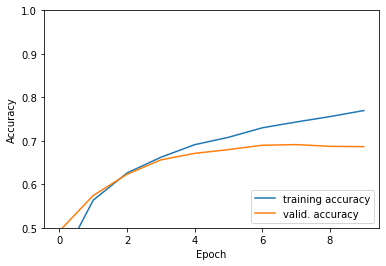

In [13]:
plt.plot(history.history['accuracy'], label='training accuracy') # For TF2
#plt.plot(history.history['acc'], label='training accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid. accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid. accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

### TO DO (by you): Make Predictions
Apply the learned network to **'test_images'** and generate predictions.

Look at the code from HW#4 or other tutorial code for the syntax. You should generate predictions and create/write a KAGGLE submission file.

### Grid Search to find the best optimizer:

In [14]:
from sklearn.model_selection import GridSearchCV

from keras.wrappers.scikit_learn import KerasClassifier

def create_model(optimizer='adam'):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=0)

optimizers = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
params = {'optimizer': optimizers}
gs = GridSearchCV(estimator = model, param_grid = params, n_jobs=-1, cv=3)

gs_results = gs.fit(train_images, train_labels)

In [15]:
means = gs_results.cv_results_['mean_test_score']
stds = gs_results.cv_results_['std_test_score']
parameters = gs_results.cv_results_['params']

for mean, stdev, param in zip(means, stds, parameters):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.634125 (0.008479) with: {'optimizer': 'SGD'}
0.628051 (0.020723) with: {'optimizer': 'RMSprop'}
0.408500 (0.012218) with: {'optimizer': 'Adagrad'}
0.225474 (0.020728) with: {'optimizer': 'Adadelta'}
0.653175 (0.005303) with: {'optimizer': 'Adam'}
0.666650 (0.010298) with: {'optimizer': 'Adamax'}
0.649775 (0.008813) with: {'optimizer': 'Nadam'}


The best optimizer appears to be Adamax, as it achieved the highest average cross-validation accuracy during the grid search. Therefore, this is the optimizer that will be applied for all future models constructed moving forward.

### Add additional Convolution layers (with padding) and another Max Pooling layer:

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [18]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 157s 125ms/step - loss: 1.9088 - accuracy: 0.2982 - val_loss: 1.4150 - val_accuracy: 0.4786
Epoch 2/10
1250/1250 [==============================] - 142s 113ms/step - loss: 1.3418 - accuracy: 0.5168 - val_loss: 1.1474 - val_accuracy: 0.5823
Epoch 3/10
1250/1250 [==============================] - 175s 140ms/step - loss: 1.0956 - accuracy: 0.6086 - val_loss: 0.9854 - val_accuracy: 0.6497
Epoch 4/10
1250/1250 [==============================] - 165s 132ms/step - loss: 0.9190 - accuracy: 0.6804 - val_loss: 0.8885 - val_accuracy: 0.6865
Epoch 5/10
1250/1250 [==============================] - 146s 117ms/step - loss: 0.8025 - accuracy: 0.7185 - val_loss: 0.8427 - val_accuracy: 0.7070
Epoch 6/10
1250/1250 [==============================] - 144s 115ms/step - loss: 0.7072 - accuracy: 0.7506 - val_loss: 0.7776 - val_accuracy: 0.7312
Epoch 7/10
1250/1250 [==============================] - 144s 115ms/step - loss: 0.6084 - accuracy: 0.7881 - val_

313/313 - 6s - loss: 0.8088 - accuracy: 0.7407
valid_accuracy=0.7407000064849854, valid_loss=0.8088181614875793


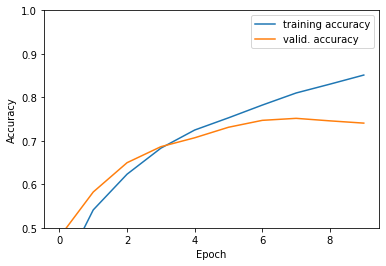

In [19]:
plt.plot(history.history['accuracy'], label='training accuracy') 
plt.plot(history.history['val_accuracy'], label = 'valid. accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

This model appears to be overfit, as there is a very large gap between the training and evaluation accuracy. Thus, dropout will be added to hopefully help reduce the disparity between training accuracy and evaluation accuracy.

### Add Spatial Dropout for last two Max Pooling layers and additional Convolution layers:

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.SpatialDropout2D(0.1))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(layers.SpatialDropout2D(0.1))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [21]:
model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [22]:
history2 = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 210s 167ms/step - loss: 1.9528 - accuracy: 0.2687 - val_loss: 1.4408 - val_accuracy: 0.4697
Epoch 2/10
1250/1250 [==============================] - 209s 167ms/step - loss: 1.3610 - accuracy: 0.5013 - val_loss: 1.4267 - val_accuracy: 0.5094
Epoch 3/10
1250/1250 [==============================] - 216s 173ms/step - loss: 1.1245 - accuracy: 0.5990 - val_loss: 1.0559 - val_accuracy: 0.6241
Epoch 4/10
1250/1250 [==============================] - 214s 172ms/step - loss: 0.9578 - accuracy: 0.6606 - val_loss: 0.9188 - val_accuracy: 0.6757
Epoch 5/10
1250/1250 [==============================] - 219s 175ms/step - loss: 0.8351 - accuracy: 0.7063 - val_loss: 0.8199 - val_accuracy: 0.7094
Epoch 6/10
1250/1250 [==============================] - 194s 155ms/step - loss: 0.7564 - accuracy: 0.7346 - val_loss: 0.8028 - val_accuracy: 0.7165
Epoch 7/10
1250/1250 [==============================] - 201s 161ms/step - loss: 0.6788 - accuracy: 0.7598 - val_

313/313 - 9s - loss: 0.7289 - accuracy: 0.7611
valid_accuracy=0.7610999941825867, valid_loss=0.7288599014282227


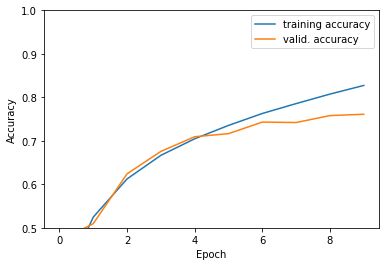

In [23]:
plt.plot(history2.history['accuracy'], label='training accuracy') 
plt.plot(history2.history['val_accuracy'], label = 'valid. accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

Adding the dropout layers did help to decrease the gap between training and validation accuracy, however, as a result the model appears to be learning at a slower rate. Therefore, the model will be trained for additional epochs.

### Train model for 15 epochs:

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(layers.SpatialDropout2D(0.1))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.SpatialDropout2D(0.1))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [25]:
model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [26]:
history3 = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/15
1250/1250 [==============================] - 229s 183ms/step - loss: 2.0074 - accuracy: 0.2486 - val_loss: 1.5227 - val_accuracy: 0.4523
Epoch 2/15
1250/1250 [==============================] - 207s 165ms/step - loss: 1.4469 - accuracy: 0.4724 - val_loss: 1.2253 - val_accuracy: 0.5505
Epoch 3/15
1250/1250 [==============================] - 213s 170ms/step - loss: 1.2235 - accuracy: 0.5590 - val_loss: 1.0697 - val_accuracy: 0.6221
Epoch 4/15
1250/1250 [==============================] - 204s 163ms/step - loss: 1.0658 - accuracy: 0.6190 - val_loss: 0.9652 - val_accuracy: 0.6575
Epoch 5/15
1250/1250 [==============================] - 194s 156ms/step - loss: 0.9289 - accuracy: 0.6684 - val_loss: 0.9025 - val_accuracy: 0.6795
Epoch 6/15
1250/1250 [==============================] - 220s 176ms/step - loss: 0.8391 - accuracy: 0.7039 - val_loss: 0.8384 - val_accuracy: 0.7007
Epoch 7/15
1250/1250 [==============================] - 205s 164ms/step - loss: 0.7504 - accuracy: 0.7376 - val_

313/313 - 11s - loss: 0.8161 - accuracy: 0.7610
valid_accuracy=0.7609999775886536, valid_loss=0.816068708896637


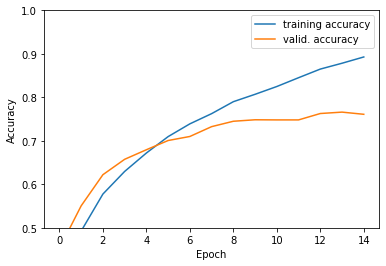

In [27]:
plt.plot(history3.history['accuracy'], label='training accuracy') 
plt.plot(history3.history['val_accuracy'], label = 'valid. accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

After training for 15 epochs, there again seems to be a rather large gap between training and validation accuracy. Thus, the dropout rate for one of the Spatial Dropouts will be increased.

### Increase dropout rate for one of the Spatial Dropouts (train for 13 epochs):

In [32]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu'))
#model.add(layers.SpatialDropout2D(0.2))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(layers.SpatialDropout2D(0.2))               # increase dropout rate
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu')) 
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(layers.SpatialDropout2D(0.1))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))


model.add(layers.Flatten())
#model.add(layers.Dense(512, activation='relu')) 
#model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(10, activation='softmax')) 

In [33]:
model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [34]:
# train for 13 epochs:
history4 = model.fit(train_images, train_labels, epochs=13, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/13
1250/1250 [==============================] - 239s 190ms/step - loss: 1.9675 - accuracy: 0.2598 - val_loss: 1.4328 - val_accuracy: 0.4699
Epoch 2/13
1250/1250 [==============================] - 229s 184ms/step - loss: 1.4235 - accuracy: 0.4804 - val_loss: 1.2460 - val_accuracy: 0.5480
Epoch 3/13
1250/1250 [==============================] - 247s 197ms/step - loss: 1.1923 - accuracy: 0.5721 - val_loss: 1.0655 - val_accuracy: 0.6202
Epoch 4/13
1250/1250 [==============================] - 219s 175ms/step - loss: 1.0302 - accuracy: 0.6325 - val_loss: 0.9524 - val_accuracy: 0.6605
Epoch 5/13
1250/1250 [==============================] - 233s 186ms/step - loss: 0.9169 - accuracy: 0.6782 - val_loss: 0.8731 - val_accuracy: 0.6925
Epoch 6/13
1250/1250 [==============================] - 231s 185ms/step - loss: 0.8197 - accuracy: 0.7114 - val_loss: 0.8136 - val_accuracy: 0.7185
Epoch 7/13
1250/1250 [==============================] - 233s 186ms/step - loss: 0.7372 - accuracy: 0.7413 - val_

313/313 - 9s - loss: 0.6674 - accuracy: 0.7873
valid_accuracy=0.7872999906539917, valid_loss=0.667430579662323


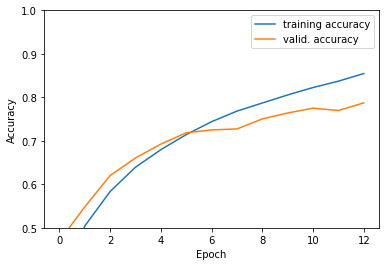

In [35]:
plt.plot(history4.history['accuracy'], label='training accuracy') 
plt.plot(history4.history['val_accuracy'], label = 'valid. accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

This is the best model produced thus far. The validation accuracy is relatively high (~ 78.73%), and the gap between the training accuracy and validation accuracy has narrowed significantly.

In [40]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
spatial_dropout2d_7 (Spatial (None, 16, 16, 64)       

### Add Batch Normalization (instead of dropout) and increase nodes in last hidden (dense) layer:

In [49]:
from keras.layers import BatchNormalization

# Remove several Convolution layers (to reduce overfitting):
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(BatchNormalization())  # batch normalization
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(BatchNormalization())  # batch normalization
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(BatchNormalization())  # batch normalization
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(BatchNormalization())  # batch normalization
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(BatchNormalization())  # batch normalization
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) # increased number of nodes
model.add(BatchNormalization())  # batch normalization
#model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(10, activation='softmax'))

In [50]:
model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [51]:

history5 = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 191s 152ms/step - loss: 1.6312 - accuracy: 0.4482 - val_loss: 1.3489 - val_accuracy: 0.5586
Epoch 2/10
1250/1250 [==============================] - 210s 168ms/step - loss: 0.9762 - accuracy: 0.6592 - val_loss: 1.0513 - val_accuracy: 0.6411
Epoch 3/10
1250/1250 [==============================] - 196s 157ms/step - loss: 0.7368 - accuracy: 0.7437 - val_loss: 0.8711 - val_accuracy: 0.6984
Epoch 4/10
1250/1250 [==============================] - 186s 149ms/step - loss: 0.5610 - accuracy: 0.8055 - val_loss: 0.8157 - val_accuracy: 0.7235
Epoch 5/10
1250/1250 [==============================] - 178s 143ms/step - loss: 0.4209 - accuracy: 0.8572 - val_loss: 0.8324 - val_accuracy: 0.7242
Epoch 6/10
1250/1250 [==============================] - 179s 143ms/step - loss: 0.3122 - accuracy: 0.8916 - val_loss: 0.7786 - val_accuracy: 0.7596
Epoch 7/10
1250/1250 [==============================] - 192s 153ms/step - loss: 0.2137 - accuracy: 0.9294 - val_

313/313 - 12s - loss: 0.9427 - accuracy: 0.7562
valid_accuracy=0.7562000155448914, valid_loss=0.9427022337913513


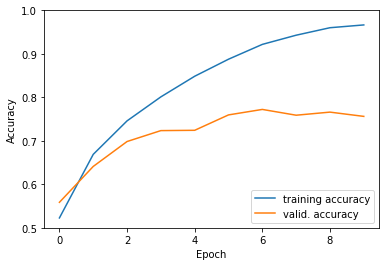

In [52]:
plt.plot(history5.history['accuracy'], label='training accuracy') 
plt.plot(history5.history['val_accuracy'], label = 'valid. accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

This model appears to be overfit, although the test accuracy is very high (most likely a result of the increase in nodes in the last dense, hidden layer). Therefore, spatial dropouts will be added back in.

### *BEST MODEL:*  Batch Normalization with Spatial Dropout:

In [74]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(BatchNormalization())  # batch normalization
#model.add(layers.SpatialDropout2D(0.1))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(BatchNormalization())  # batch normalization
model.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(BatchNormalization())  # batch normalization
model.add(layers.SpatialDropout2D(0.2))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(BatchNormalization())  # batch normalization
model.add(layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(BatchNormalization())  # batch normalization
model.add(layers.SpatialDropout2D(0.1))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) # increased number of nodes
model.add(BatchNormalization())  # batch normalization
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

In [75]:
model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [76]:
history6 = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/15
1250/1250 [==============================] - 213s 169ms/step - loss: 1.9371 - accuracy: 0.3781 - val_loss: 1.6039 - val_accuracy: 0.4775
Epoch 2/15
1250/1250 [==============================] - 202s 161ms/step - loss: 1.2538 - accuracy: 0.5640 - val_loss: 1.2113 - val_accuracy: 0.5745
Epoch 3/15
1250/1250 [==============================] - 197s 158ms/step - loss: 0.9828 - accuracy: 0.6562 - val_loss: 0.8797 - val_accuracy: 0.6847
Epoch 4/15
1250/1250 [==============================] - 204s 163ms/step - loss: 0.8171 - accuracy: 0.7141 - val_loss: 0.7705 - val_accuracy: 0.7317
Epoch 5/15
1250/1250 [==============================] - 216s 173ms/step - loss: 0.7083 - accuracy: 0.7530 - val_loss: 0.7465 - val_accuracy: 0.7387
Epoch 6/15
1250/1250 [==============================] - 195s 156ms/step - loss: 0.6186 - accuracy: 0.7858 - val_loss: 0.6502 - val_accuracy: 0.7752
Epoch 7/15
1250/1250 [==============================] - 191s 153ms/step - loss: 0.5464 - accuracy: 0.8068 - val_

313/313 - 8s - loss: 0.6816 - accuracy: 0.7962
valid_accuracy=0.7961999773979187, valid_loss=0.6816133260726929


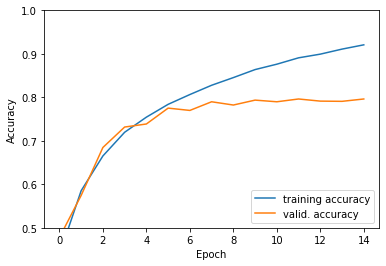

In [77]:
plt.plot(history6.history['accuracy'], label='training accuracy') 
plt.plot(history6.history['val_accuracy'], label = 'valid. accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

This is my **best model**.  It achieved a validation accuracy of nearly 80%.

In [73]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
spatial_dropout2d_13 (Spatia (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_21 (Batc (None, 16, 16, 64)      

#### Write predictions of test set to csv file:

In [79]:
predictions = model.predict(test_images)

In [80]:
import csv
with open('predictions.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    header = ['id','cat0','cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9']
    writer.writerow(header)
    count = 1
    for row in range(0, len(predictions)):
        preds = []
        preds.append(count)
        count += 1
        for i in range(10):
            preds.append(predictions[row][i])
        writer.writerow(preds)